In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler

C:\Users\nur\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nur\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nur\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\nur\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type

In [ ]:
def input_generator():
    i=0
    while i <100:
        x = np.random.rand(3,1)*10.0
        x1 = np.random.rand(3,1)*10.0
        #y = np.random.rand(1,1)*10.0
        y = x[0]+2*x[1]+x[2]+np.random.rand(3,1)*0.01
        i+=1
        yield ([x,x1],y)


In [ ]:
store_in = keras.Input(shape=(1,))
dense = layers.Dense(64, activation="relu",name="hidden1")
x= dense(store_in)
x = layers.Dense(64, activation="relu",name="hidden2")(x)
outputs = layers.Dense(10,name="output_layer")(x)


item_in = keras.Input(shape=(1,))
dense = layers.Dense(64, activation="relu",name="hidden3")
xi= dense(item_in)
xi = layers.Dense(64, activation="relu",name="hidden4")(xi)
output_i = layers.Dense(10,name="output_layer")(xi)

layer_output = layers.add([x, xi])
outputtt = layers.Dense(10,name="output_layer")(layer_output)

model = keras.Model(inputs=[store_in,item_in], outputs=outputtt, name="Model")


model.compile(
    loss=keras.losses.MSE,
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

In [ ]:
gen = input_generator()

model.fit(x=gen, epochs=3,steps_per_epoch=10)

Epoch 1/3
10/10 [==============================] - 0s 2ms/step - loss: 47.6962 - accuracy: 0.3000
Epoch 2/3
10/10 [==============================] - 0s 2ms/step - loss: 68.8945 - accuracy: 0.4000
Epoch 3/3
10/10 [==============================] - 0s 2ms/step - loss: 73.1136 - accuracy: 0.4667


In [ ]:
model.summary()

Model: "Model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_25 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
hidden1 (Dense)                 (None, 64)           128         input_24[0][0]                   
__________________________________________________________________________________________________
hidden3 (Dense)                 (None, 64)           128         input_25[0][0]                   
______________________________________________________________________________________________

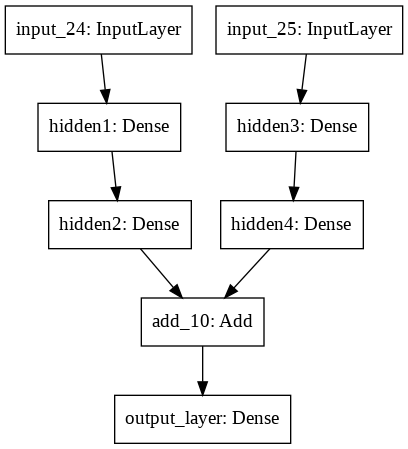

In [ ]:
keras.utils.plot_model(model, "my_first_model.png")
